## Importing and calling all my libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib.image import imread
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import ceil,floor
from sklearn.feature_selection import SelectKBest,f_classif

import pickle
pd.set_option("display.float_format",'{:2f}'.format)

## Loading the dataset

In [2]:
df=pd.read_csv('Housing_dataset_train.csv')

## Understanding the context of the Data

In [3]:
df.head(20)

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.000000,2.000000,1.000000,1149999.565000
1,2748,Ondo,Apartment,NaN,2.000000,4.000000,1672416.689000
2,9261,Ekiti,NaN,7.000000,5.000000,NaN,3364799.814000
3,2224,Anambra,Detached duplex,5.000000,2.000000,4.000000,2410306.756000
4,10300,Kogi,Terrace duplex,NaN,5.000000,6.000000,2600700.898000
5,1733,Borno,Mansion,NaN,1.000000,3.000000,1341750.867000
6,7892,Kwara,Bungalow,NaN,4.000000,4.000000,2125789.778000
7,3003,Katsina,Penthouse,3.000000,3.000000,5.000000,2043107.592000
8,555,Osun,Semi-detached duplex,NaN,1.000000,2.000000,1219453.877000
9,3085,Kaduna,Penthouse,NaN,3.000000,3.000000,2710664.872000


In [4]:
sb=df[(df['loc']=='Kwara') & (df['title']=='Apartment')]

In [5]:
sb.head(30)

,ID,loc,title,bedroom,bathroom,parking_space,price
551,11993,Kwara,Apartment,5.000000,2.000000,4.000000,1521282.324000
1081,728,Kwara,Apartment,3.000000,2.000000,4.000000,1116816.155000
1242,478,Kwara,Apartment,3.000000,2.000000,3.000000,1139585.939000
1485,10776,Kwara,Apartment,4.000000,4.000000,2.000000,1361271.296000
2454,2252,Kwara,Apartment,4.000000,NaN,5.000000,1415925.423000
2686,7980,Kwara,Apartment,3.000000,2.000000,NaN,1168224.446000
3130,10778,Kwara,Apartment,2.000000,6.000000,3.000000,1089773.075000
3243,937,Kwara,Apartment,1.000000,3.000000,5.000000,881018.058000
3340,2991,Kwara,Apartment,4.000000,2.000000,NaN,1285204.428000
3516,8671,Kwara,Apartment,3.000000,5.000000,NaN,1214016.099000


## Understanding the Data Types and handling them & knowing my data shape

In [6]:
df.dtypes

ID                 int64
loc               object
title             object
bedroom          float64
bathroom         float64
parking_space    float64
price            float64
dtype: object

In [7]:
df.shape

(14000, 7)

## Checking the missing values in percentages and Duplicates

In [8]:
def check(df):
    df_mv=(df.isnull().sum()/df.shape[0])*100
    print('Missing values:')
    print(df_mv)
    
    df_dv=df.duplicated().sum()
    print("\nDuplicated value:")
    print(df_dv)
    return df

In [9]:
df=check(df)

Missing values:
ID               0.000000
loc             12.950000
title           12.300000
bedroom         12.850000
bathroom        12.892857
parking_space   12.935714
price            0.000000
dtype: float64

Duplicated value:
0



## Checking the unique vales by Data types and the No of unique values

In [10]:
for i in df.columns:
    if df[i].dtypes=='O':
        print(f"\n\n{i} has {df[i].nunique()} categories, and the categories are:\n\n{df[i].unique()}")



loc has 36 categories, and the categories are:

['Katsina' 'Ondo' 'Ekiti' 'Anambra' 'Kogi' 'Borno' 'Kwara' 'Osun' 'Kaduna'
 'Ogun' 'Bayelsa' nan 'Abia' 'Rivers' 'Taraba' 'Ebonyi' 'Kebbi' 'Enugu'
 'Edo' 'Nasarawa' 'Delta' 'Kano' 'Yobe' 'Benue' 'Bauchi' 'Cross River'
 'Niger' 'Adamawa' 'Plateau' 'Imo' 'Oyo' 'Zamfara' 'Sokoto' 'Jigawa'
 'Gombe' 'Akwa Ibom' 'Lagos']


title has 10 categories, and the categories are:

['Semi-detached duplex' 'Apartment' nan 'Detached duplex' 'Terrace duplex'
 'Mansion' 'Bungalow' 'Penthouse' 'Townhouse' 'Flat' 'Cottage']


In [11]:
for i in df.columns:
    if df[i].dtypes=='int64':
        print(f"\n\n{i} has {df[i].nunique()} categories, and the categories are:\n\n{df[i].unique()}")



ID has 10182 categories, and the categories are:

[ 3583  2748  9261 ... 11190  9256  8787]


In [12]:
for i in df.columns:
    if df[i].dtypes=='float':
        print(f"\n\n{i} has {df[i].nunique()} categories, and the categories are:\n\n{df[i].unique()}")



bedroom has 9 categories, and the categories are:

[ 2. nan  7.  5.  3.  1.  4.  6.  9.  8.]


bathroom has 7 categories, and the categories are:

[ 2.  5.  1.  4.  3. nan  7.  6.]


parking_space has 6 categories, and the categories are:

[ 1.  4. nan  6.  3.  5.  2.]


price has 10727 categories, and the categories are:

[1149999.565 1672416.689 3364799.814 ... 1508351.845 2458443.818
 3348918.718]


In [13]:
df['price'].describe()

count      14000.000000
mean     2138081.748741
std      1083056.664885
min       431967.290000
25%      1393989.517500
50%      1895223.070500
75%      2586699.494000
max     16568486.160000
Name: price, dtype: float64

## Action
## Splitting the data set

In [14]:
train,test = train_test_split(df, test_size=0.2,random_state=123)

In [15]:

train.reset_index(drop=True, inplace=True)
train.head(10)

,ID,loc,title,bedroom,bathroom,parking_space,price
0,1071,Kaduna,Mansion,5.000000,NaN,NaN,1844794.735000
1,5387,Akwa Ibom,NaN,3.000000,1.000000,3.000000,2311740.104000
2,8100,Benue,Semi-detached duplex,5.000000,NaN,1.000000,1935196.750000
3,11439,Ekiti,Mansion,4.000000,7.000000,1.000000,3647818.339000
4,531,Nasarawa,Flat,1.000000,2.000000,NaN,1060264.550000
5,2134,Gombe,NaN,1.000000,1.000000,5.000000,826199.566200
6,447,Cross River,Penthouse,NaN,NaN,1.000000,2988362.900000
7,8816,Edo,Penthouse,8.000000,6.000000,6.000000,4146174.682000
8,11655,Delta,Semi-detached duplex,9.000000,5.000000,NaN,3781399.545000
9,950,NaN,Semi-detached duplex,3.000000,1.000000,1.000000,1730987.927000


## Checking the shape of my train dataset

In [16]:
train.shape

(11200, 7)

## Checking the irregularities(missing values and duplicates) on my train data

In [17]:
train=check(train)

Missing values:
ID               0.000000
loc             12.857143
title           12.419643
bedroom         12.883929
bathroom        12.857143
parking_space   12.910714
price            0.000000
dtype: float64

Duplicated value:
0


## Action
## Handling all Irregularities(missing values) cause it's takes more percentage of my data.

In [18]:
## categorical missing data handling
train['loc'] = train['loc'].fillna(train['loc'].mode().iloc[0])
train['title'] = train['title'].fillna(train['title'].mode().iloc[0])

##Numeric missing data handling
train['bedroom'] = train['bedroom'].fillna(train['bedroom'].mean())
train['bathroom'] = train['bathroom'].fillna(train['bathroom'].mean())
train['parking_space'] = train['parking_space'].fillna(train['parking_space'].mean())
train['price']= train['price'].round(2)






In [19]:
train=check(train)

Missing values:
ID              0.000000
loc             0.000000
title           0.000000
bedroom         0.000000
bathroom        0.000000
parking_space   0.000000
price           0.000000
dtype: float64

Duplicated value:
0


## Action

## Setting the dataset Datatypes Right Using Human Thoughts and Data Science Knowledge

In [20]:
train['bedroom']= train['bedroom'].astype('int64')
train['bathroom']= train['bathroom'].astype('int64')
train['parking_space']= train['parking_space'].astype('int64')




In [21]:
train.dtypes

ID                 int64
loc               object
title             object
bedroom            int64
bathroom           int64
parking_space      int64
price            float64
dtype: object

In [22]:
for i in train.columns:
    if train[i].dtypes=='O':
        print(f"\n\n{i} has {train[i].nunique()} categories, and the categories are:\n\n{train[i].unique()}")



loc has 36 categories, and the categories are:

['Kaduna' 'Akwa Ibom' 'Benue' 'Ekiti' 'Nasarawa' 'Gombe' 'Cross River'
 'Edo' 'Delta' 'Borno' 'Adamawa' 'Taraba' 'Ebonyi' 'Lagos' 'Bayelsa'
 'Enugu' 'Sokoto' 'Imo' 'Ogun' 'Osun' 'Jigawa' 'Kogi' 'Bauchi' 'Anambra'
 'Abia' 'Oyo' 'Katsina' 'Ondo' 'Rivers' 'Kwara' 'Kebbi' 'Plateau' 'Niger'
 'Zamfara' 'Kano' 'Yobe']


title has 10 categories, and the categories are:

['Mansion' 'Flat' 'Semi-detached duplex' 'Penthouse' 'Townhouse'
 'Apartment' 'Cottage' 'Bungalow' 'Terrace duplex' 'Detached duplex']


In [23]:
for i in train.columns:
    if train[i].dtypes=='int64':
        print(f"\n\n{i} has {train[i].nunique()} categories, and the categories are:\n\n{train[i].unique()}")



ID has 8629 categories, and the categories are:

[ 1071  5387  8100 ...  5328  7262 12523]


bedroom has 9 categories, and the categories are:

[5 3 4 1 8 9 2 7 6]


bathroom has 7 categories, and the categories are:

[3 1 7 2 6 5 4]


parking_space has 6 categories, and the categories are:

[3 1 5 6 4 2]


In [24]:
for i in train.columns:
    if train[i].dtypes=='float':
        print(f"\n\n{i} has {train[i].nunique()} categories, and the categories are:\n\n{train[i].unique()}")



price has 8966 categories, and the categories are:

[1844794.74 2311740.1  1935196.75 ... 2593970.51 2843936.81 2030279.8 ]


## checking irregularities

In [25]:
train.duplicated().sum()

0

In [26]:
train.isnull().sum().sum()

0

In [27]:
train.head(20)

,ID,loc,title,bedroom,bathroom,parking_space,price
0,1071,Kaduna,Mansion,5,3,3,1844794.740000
1,5387,Akwa Ibom,Flat,3,1,3,2311740.100000
2,8100,Benue,Semi-detached duplex,5,3,1,1935196.750000
3,11439,Ekiti,Mansion,4,7,1,3647818.340000
4,531,Nasarawa,Flat,1,2,3,1060264.550000
5,2134,Gombe,Flat,1,1,5,826199.570000
6,447,Cross River,Penthouse,4,3,1,2988362.900000
7,8816,Edo,Penthouse,8,6,6,4146174.680000
8,11655,Delta,Semi-detached duplex,9,5,3,3781399.540000
9,950,Kaduna,Semi-detached duplex,3,1,1,1730987.930000


 ## Feature Engr 

In [28]:
##average_price_per_loc = train.groupby('loc')['price'].mean()
##print( average_price_per_loc)
#train['avg_price_per_loc'] = train['loc'].map(average_price_per_loc)
##train.head(50)

## Action

## Checking and handling Outlier

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

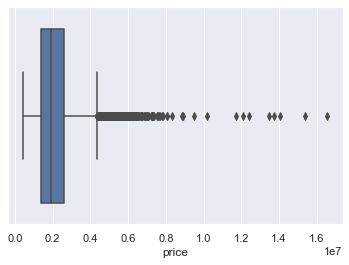

In [29]:
sns.boxplot(train['price'])

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

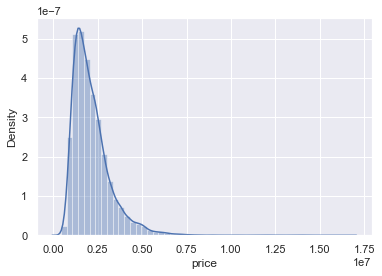

In [30]:
sns.distplot(train['price'])

In [31]:
def cap_outlier(data,var):
    q1,q3=np.percentile(data[var],[25,75])
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    
    data[var].values[data[var].values>upper]=upper
    data[var].values[data[var].values<lower]=lower
    data.reset_index(drop=True,inplace=True)
    return data

In [32]:
train=cap_outlier(train,'price')

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

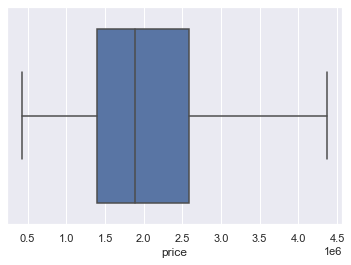

In [33]:
sns.boxplot(train['price'])

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

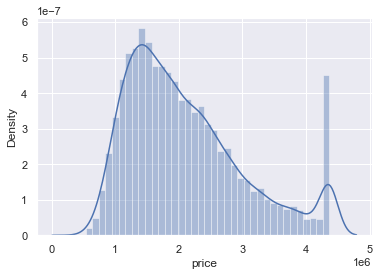

In [34]:
sns.distplot(train['price'])

## Action 
## Dropping the iD column cause it's irrelevant and dropping the duplicates that cause the ID is the unique identifier and dropping it will lead to some data having duplicates 

In [35]:
train.drop(['ID'],axis=1,inplace=True)
# dropping duplicated values
train.drop_duplicates(keep='first',inplace=True)
train.reset_index(drop=True,inplace=True)

In [36]:
train.isnull().sum()
train.duplicated().sum()

0

In [37]:
train.shape

(11108, 6)

In [38]:
col1 = train.columns
col1

Index(['loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

In [39]:
train.duplicated().sum()

0

## Action
## Splitting data to Target(Dependent) and Variable(independent) data

In [40]:
X_train = train.drop(['price'],axis=1)
y_train = train['price']

In [41]:
cat1=[]
for i in X_train.columns:
    if X_train[i].dtype=="O":
        cat1.append(i)

In [42]:
cat1

['loc', 'title']

## Action
## Encoding object columns

In [43]:
encoder= OrdinalEncoder()

X_train[cat1]=encoder.fit_transform(X_train[cat1])

In [44]:
X_train

,loc,title,bedroom,bathroom,parking_space
0,17.000000,5.000000,5,3,3
1,2.000000,4.000000,3,1,3
2,6.000000,7.000000,5,3,1
3,12.000000,5.000000,4,7,1
4,24.000000,4.000000,1,2,3
...,...,...,...,...,...
11103,17.000000,7.000000,4,3,1
11104,16.000000,4.000000,1,3,1
11105,5.000000,5.000000,3,1,1
11106,15.000000,7.000000,8,3,5


## Checking the shape of my X_train

In [45]:
X_train.shape

(11108, 5)

## Action

## checking for Correlation and multicolinearity

<AxesSubplot:>

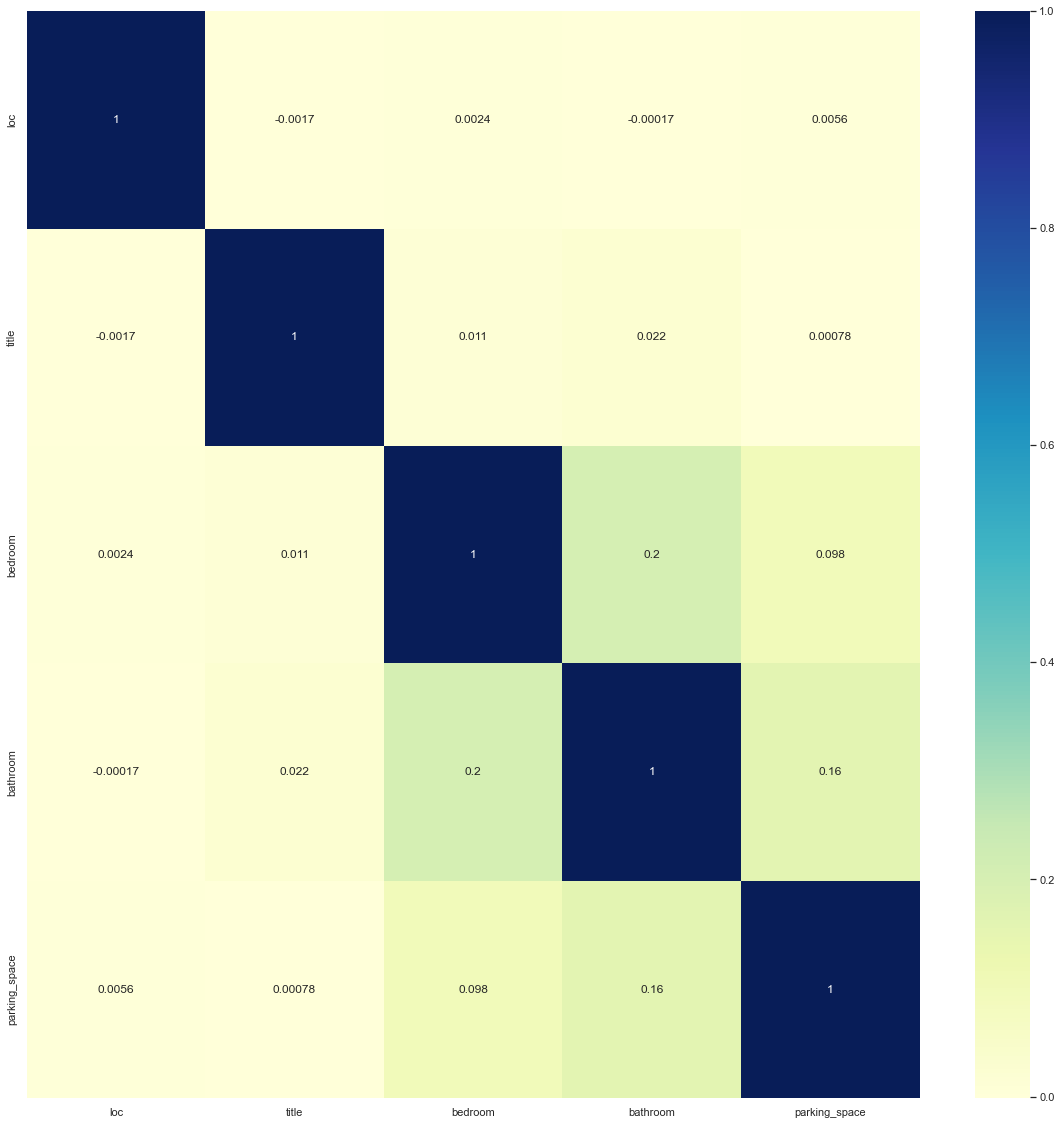

In [46]:
plt.figure(figsize=(20,20))
cors = X_train.corr()
sns.heatmap(cors, annot= True, cmap="YlGnBu")

<AxesSubplot:>

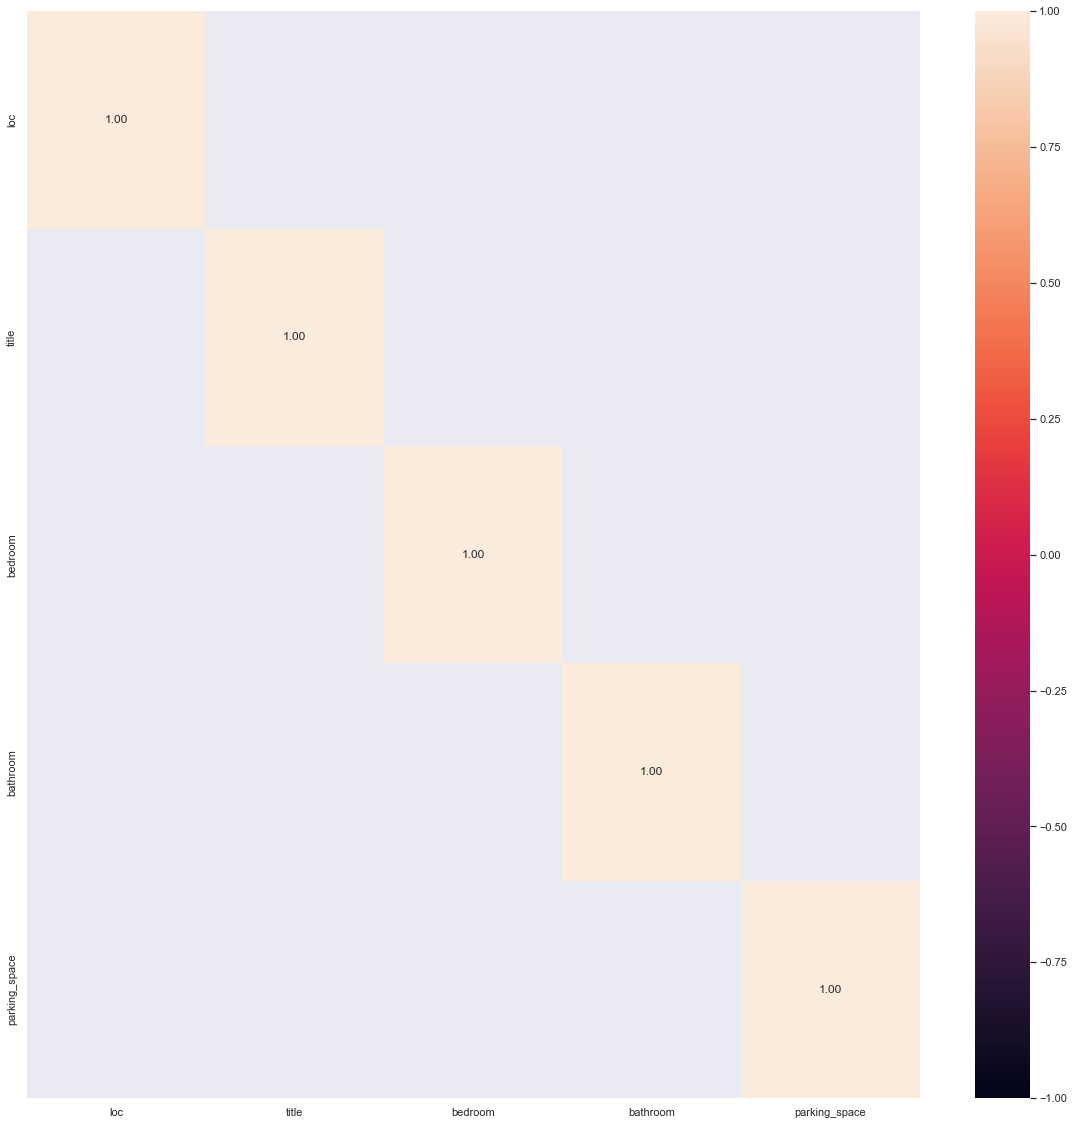

In [47]:
mask = cors[(cors >= 0.70)|(cors <= -0.70)]

plt.figure(figsize=(20,20))
sns.heatmap(mask, vmin=-1, vmax=1, annot=True, fmt='0.2f')

In [48]:

col2 = X_train.columns 

## Action 
## Scaling the data to reduce off Relative Magnitude

In [49]:

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)


In [50]:
X_train = pd.DataFrame(X_train, columns=col2)
X_train

,loc,title,bedroom,bathroom,parking_space
0,0.485714,0.555556,0.500000,0.333333,0.400000
1,0.057143,0.444444,0.250000,0.000000,0.400000
2,0.171429,0.777778,0.500000,0.333333,0.000000
3,0.342857,0.555556,0.375000,1.000000,0.000000
4,0.685714,0.444444,0.000000,0.166667,0.400000
...,...,...,...,...,...
11103,0.485714,0.777778,0.375000,0.333333,0.000000
11104,0.457143,0.444444,0.000000,0.333333,0.000000
11105,0.142857,0.555556,0.250000,0.000000,0.000000
11106,0.428571,0.777778,0.875000,0.333333,0.800000


In [51]:
C = train.corr()['price'].sort_values(ascending=False).drop('price')
C 

bedroom         0.565644
bathroom        0.248066
parking_space   0.114208
Name: price, dtype: float64

## Action
## Feature Selection using Features importance Techniques

In [52]:
from sklearn.feature_selection import SelectKBest,f_classif

k=5
selector=SelectKBest(f_classif,k=5)
X_res_new=selector.fit_transform(X_train, y_train)
scores= pd.DataFrame({'Features':X_train.columns,'Score':selector.scores_})
top_feat=scores.sort_values('Score',ascending=False)
top_feat.head(15)


,Features,Score
2,bedroom,3.929193
4,parking_space,3.804303
3,bathroom,3.708105
1,title,1.905472
0,loc,1.030143


In [53]:
decision_tree = DecisionTreeRegressor(max_depth = 10)
decision_tree.fit(X_train, y_train)
predictors = col2

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

,0
bedroom,0.427923
title,0.379067
loc,0.152003
bathroom,0.031081
parking_space,0.009925


## Action

## A Function to pass the test data through same processs & preprocess as train to avoid any bias stages

In [54]:
def prepare(df):
    ## resetting the data index
    df.reset_index(drop=True, inplace=True)
    
    ## categorical missing data handling
    df['loc'] = df['loc'].fillna(df['loc'].mode().iloc[0])
    df['title'] = df['title'].fillna(df['title'].mode().iloc[0])

    ##Numeric missing data handling
    df['bedroom'] = df['bedroom'].fillna(df['bedroom'].mean())
    df['bathroom'] = df['bathroom'].fillna(df['bathroom'].mean())
    df['parking_space'] = df['parking_space'].fillna(df['parking_space'].mean())
    df['price']= df['price'].round(2)
    
    ## handling the data types
    df['bedroom']= df['bedroom'].astype('int64')
    df['bathroom']= df['bathroom'].astype('int64')
    df['parking_space']= df['parking_space'].astype('int64')

    ## Feature engr
    #average_price_per_loc = df.groupby('loc')['price'].mean()
    #df['avg_price_per_loc'] = df['loc'].map(average_price_per_loc)
    
    ## Handling outlier
    df=cap_outlier(df,'price')

    # Dropping the ID column
    
    df.drop(['ID'],axis=1,inplace=True)
    
    # dropping duplicated values
    df.drop_duplicates(keep='first',inplace=True)
    df.reset_index(drop=True,inplace=True)

    ## splitting my train dataset to dependent and independent
    X_test = df.drop(['price'],axis=1)
    y_test = df['price']

    
    ## Encoding object variable for ML
    
    cat2=['title','loc']
    

    X_test[cat2]=encoder.fit_transform(X_test[cat2])
    
    col3=X_test.columns
    ## Scaling the data so as to avoid relative magnitude
    
    X_test = scaler.transform(X_test)
    
    X_test = pd.DataFrame(X_test, columns=col3)
    
    return X_test, y_test



In [55]:
X_test,y_test = prepare(test)

## Action
## Creating a Function to pass my all my Models

In [56]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeRegressor()
    elif input_ml_algo == 'RF':
        model = RandomForestRegressor()
    elif input_ml_algo == 'XGBC':
        model = XGBRegressor()
    elif input_ml_algo == 'LGBMC':
        model = LGBMRegressor()
    elif input_ml_algo=='LR':
        model=LinearRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsRegressor()
    return model

In [57]:
model_to_use('RF')

RandomForestRegressor()

## A function to display my model, it prediction, performance metrics, and draw a plot to show my regression line

In [58]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

def evaluate(model):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_pred)
    print('Train R^2 score:', r2_train)
    print('Test R^2 score:', r2_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    print('Train MSE:', mse_train)
    print('Test MSE:', mse_test)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    print('Train RMSE:', rmse_train)
    print('Test RMSE:', rmse_test)

    plt.subplots(figsize=(8, 5))
    plt.scatter(y_test, y_pred)
    plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), c='r')
    plt.title('Predicted vs Actual')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.grid()
    plt.show()


## Action
## Linear Regression Model

Train R^2 score: 0.3679548178356833
Test R^2 score: 0.35669935597047253
Train MSE: 521092781399.80273
Test MSE: 521851092163.43134
Train RMSE: 721867.5650005358
Test RMSE: 722392.6163544526


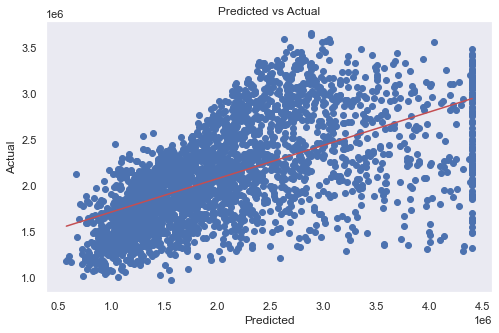

In [59]:
model1 = model_to_use("LR")
model1.fit(X_train, y_train)
evaluate(model1)

## Action
## Random forest model

Train R^2 score: 0.931927730071091
Test R^2 score: 0.7032656901816883
Train MSE: 56122520152.73093
Test MSE: 240713459714.70898
Train RMSE: 236901.92095618584
Test RMSE: 490625.5799636918


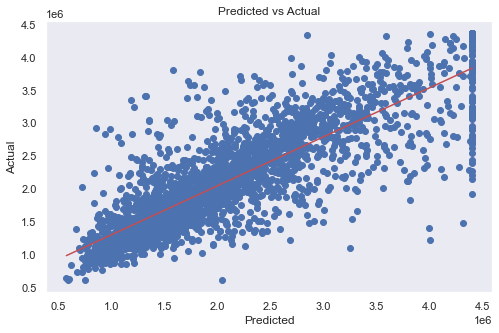

In [60]:
model2 = model_to_use("RF")
model2.fit(X_train, y_train)
evaluate(model2)

## Action
## K-nearest neighbor Model

Train R^2 score: 0.660574760708355
Test R^2 score: 0.48212768274644735
Train MSE: 279840819945.99304
Test MSE: 420102539719.4673
Train RMSE: 528999.8298166012
Test RMSE: 648153.1761238753


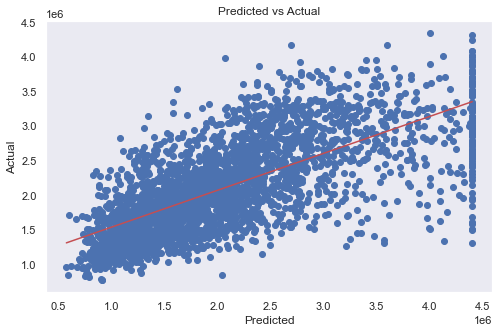

In [61]:
model3 = model_to_use("KNN")
model3.fit(X_train, y_train)
evaluate(model3)

## Action
## Decison Tree model

Train R^2 score: 0.9625953980296913
Test R^2 score: 0.5068961483769403
Train MSE: 30838409385.72877
Test MSE: 400010144413.4059
Train RMSE: 175608.68254653233
Test RMSE: 632463.5518458007


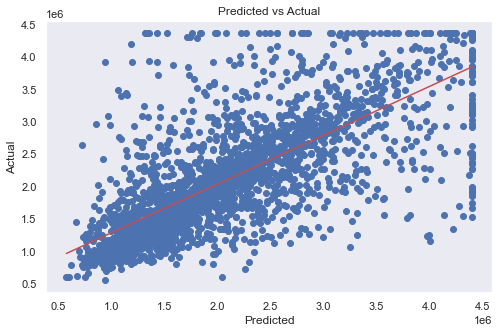

In [62]:
model4 = model_to_use("DT")
model4.fit(X_train, y_train)
evaluate(model4)

## Action
## LightGBM Regressor Model

Train R^2 score: 0.8184376297159066
Test R^2 score: 0.7797132899912499
Train MSE: 149689995586.87012
Test MSE: 178698500108.88348
Train RMSE: 386897.9136501903
Test RMSE: 422727.4536966856


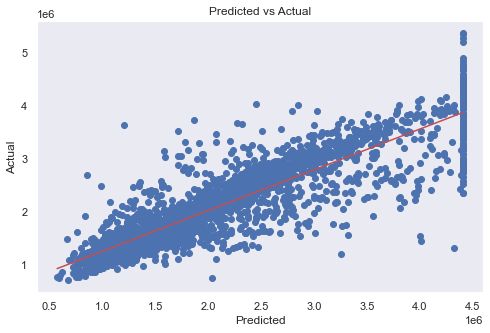

In [63]:
model5 = model_to_use("LGBMC")
model5.fit(X_train, y_train)
evaluate(model5)

## Action 
## XGboost regressor Model

Train R^2 score: 0.856290065046639
Test R^2 score: 0.7608338173282657
Train MSE: 118482367768.70647
Test MSE: 194013692966.35513
Train RMSE: 344212.67810571194
Test RMSE: 440469.8547759598


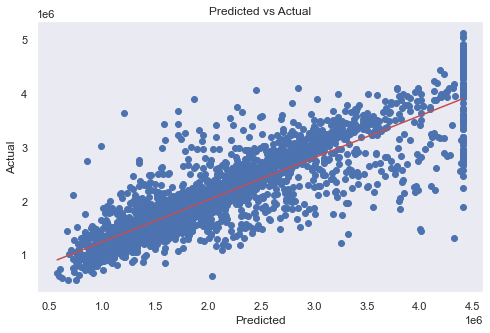

In [64]:
model6 = model_to_use("XGBC")
model6.fit(X_train, y_train)
evaluate(model6)

## Conclusion on my BEST MODEL


## _The LightGBM model is my best and most performing model the LightGBM (LGBMC) model appears to be the best choice among the three, as it strikes a good balance between generalization and predictive accuracy on unseen data_

## 1. _High Test R2 score (0.7797): The LGBMC model demonstrates good generalization to unseen data, as indicated by its high test R2 score. This means that approximately 77.97% of the variance in the target variable is explained by the model's predictions on the test dataset_.

## 2. _Lower Test RMSE (422727.4548218816): The LGBMC model has a lower test root mean squared error (RMSE) compared to both the Random Forest and XGBoost models. A lower RMSE indicates that the average prediction error on the test data is smaller, suggesting that LGBMC's predictions are closer to the actual target values_.

## 3. _ Balanced Performance: LGBMC achieves a good trade-off between the training and test R2 scores, indicating that it performs well on both the training data (R2 score: 0.8184) and unseen test data (R2 score: 0.7797). This suggests that the model is not overfitting and has the ability to generalize well to new data_.

## _In summary, LightGBM (LGBMC) is considered good and better in this scenario because of its strong performance on unseen test data, lower prediction errors (RMSE), and efficient training process. It strikes a good balance between training and test performance, indicating good generalization capabilities. Moreover, its flexibility in hyperparameter tuning and ability to handle non-linear relationships contribute to its effectiveness in capturing complex patterns in the data. Its popularity and community support also make it a reliable and widely adopted choice in various machine learning tasks. Conducting further analysis and cross-validation is recommended to make a more informed decision_.

## Checking for overfitting

In [65]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Assuming you have your training and testing data and labels in X_train, X_test, y_train, y_test respectively

# Define the number of folds for cross-validation
num_folds = 5

# Create the cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create an instance of your model

# Perform cross-validation on the training data
train_scores = cross_val_score(model5,X_train, y_train, cv=kfold)

# Fit the model on the training data
model5.fit(X_train, y_train)

# Evaluate the model on the test data
test_score = model5.score(X_test, y_test)

# Print the cross-validation scores and test score
print("Cross-validation scores:", train_scores)
print("Average score:", train_scores.mean())
print("Test score:", test_score)


Cross-validation scores: [0.78971317 0.79167016 0.77790833 0.8028936  0.77121016]
Average score: 0.7866790852919223
Test score: 0.7797132899912499


In [67]:
## Checking for Bias-variance tradeoff analysis

Linear Regression RMSE (Cross-Validation): 719539.3745025675
Random Forest RMSE (Cross-Validation): 513981.47661833186
XGBoost RMSE (Cross-Validation): 445855.9948026665
LightGBM RMSE (Cross-Validation): 422210.29075626924


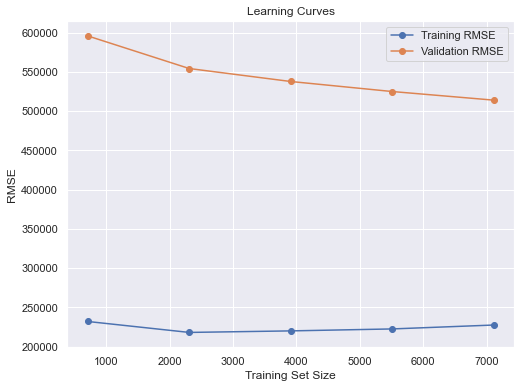

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, make_scorer

# Assuming your data is stored in X (feature matrix) and y (target variable)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create models (linear regression, random forest, XGBoost, and LightGBM)
linear_reg_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
lgbm_model = LGBMRegressor(n_estimators=100, random_state=42)

# Function to plot learning curves
def plot_learning_curves(model, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    test_rmse = np.sqrt(-test_scores.mean(axis=1))
    
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_rmse, 'o-', label='Training RMSE')
    plt.plot(train_sizes, test_rmse, 'o-', label='Validation RMSE')
    plt.xlabel('Training Set Size')
    plt.ylabel('RMSE')
    plt.legend()
    plt.title('Learning Curves')
    plt.show()

# Function to evaluate model performance using cross-validation
def evaluate_model(model, X_train, y_train):
    cv_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    return cv_rmse

# Evaluate linear regression model
linear_reg_rmse = evaluate_model(linear_reg_model, X_train, y_train)
print("Linear Regression RMSE (Cross-Validation):", linear_reg_rmse.mean())

# Evaluate random forest model
rf_rmse = evaluate_model(rf_model, X_train, y_train)
print("Random Forest RMSE (Cross-Validation):", rf_rmse.mean())

# Evaluate XGBoost model
xgb_rmse = evaluate_model(xgb_model, X_train, y_train)
print("XGBoost RMSE (Cross-Validation):", xgb_rmse.mean())

# Evaluate LightGBM model
lgbm_rmse = evaluate_model(lgbm_model, X_train, y_train)
print("LightGBM RMSE (Cross-Validation):", lgbm_rmse.mean())

# Plot learning curves for the random forest model
plot_learning_curves(rf_model, X_train, y_train)


## Overall, the evaluation of the LGBMC model through cross-validation and its performance on the test data align well. The model's average cross-validation score and test score are close, 
## indicating that it is reliably generalizing to unseen data. 
## This consistency and high performance on the test data further reinforce the notion that LightGBM (LGBMC) is a good and effective model for the given problem.

## Action 
## Optimization
## ~Grid Search~

In [69]:
param_grid_decision_tree = {'criterion': ['gini', 'entropy'],  
                            'max_depth': [10,15,20,30,40,50],
                            'min_samples_leaf' : [1,2,5]
                           } 

# Define the parameters gird for random forest
param_grid_random_forest = {'max_depth'   : [10,20,40],
                            'n_estimators' : [100,200,300],
                            'min_samples_leaf' : [1,2,5]        
                           }  

# Define the parameters gird for XGBoost
param_grid_xgb = {'min_child_weight': [1, 5, 10],
                  'gamma': [0, 1],
                  'max_depth': [5,10],
                  'learning_rate' : [0.05,0.1]
                 } 

# Define the parameters gird for LGBM
param_grid_lgbm = {'n_estimator':[100,200],
                   'num_leaves': [256,128],
                   'max_depth': [5, 8, 10],
                   'learning_rate': [0.05, 0.1]
                  }

In [70]:
def param(input_ml_algo):    
    if input_ml_algo == 'DT':
        model       = DecisionTreeClassifier()
        param_grid  = param_grid_decision_tree
    elif input_ml_algo == 'RF':
        model       = RandomForestClassifier()
        param_grid  = param_grid_random_forest
    elif input_ml_algo == 'XGBC':
        model       = XGBClassifier()
        param_grid  = param_grid_xgb
    elif input_ml_algo == 'LGBMC':
        model       = LGBMClassifier()
        param_grid  = param_grid_lgbm
    return param_grid

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
model5

LGBMRegressor()

In [73]:
model3.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [74]:
grid = GridSearchCV(model5, param_grid_lgbm , refit = True, cv=2) 

In [75]:
grid

GridSearchCV(cv=2, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [5, 8, 10],
                         'n_estimator': [100, 200], 'num_leaves': [256, 128]})

In [76]:
model7 = LGBMRegressor(max_depth=40,min_samples_leaf=2,n_estimators=100)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
Train R^2 score: 0.8310728662361169
Test R^2 score: 0.7880573397360457
Train MSE: 139638726169.64127
Test MSE: 172868824893.83292
Train RMSE: 373682.6543601419
Test RMSE: 415774.969056379


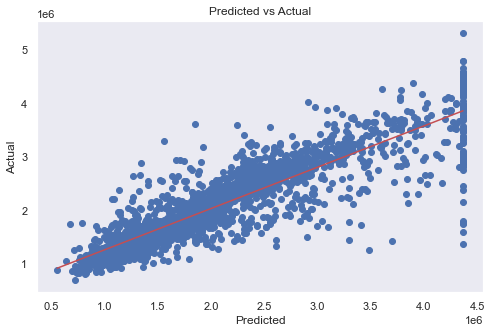

In [77]:
model7.fit(X_train, y_train)
evaluate(model7)

In [78]:
import pickle
from pickle import dump
# save the model
dump(model7, open('LGBMC_model.pkl', 'wb'))

# save encoder
dump(encoder, open('enc.pkl', 'wb'))

# save scaler
dump(scaler, open('scal.pkl', 'wb'))

## Bringing the data to test for model

In [79]:
new_data=pd.read_csv('Housing_dataset_test.csv')

In [80]:
new_data.head(20)

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1
5,9950,Edo,Detached duplex,6,4,5
6,1548,Niger,Flat,9,3,4
7,526,Anambra,Flat,1,1,4
8,6776,Niger,Flat,1,5,1
9,1851,Adamawa,Bungalow,4,1,4


In [81]:
new=check(new_data)

Missing values:
ID              0.000000
loc             0.000000
title           0.000000
bedroom         0.000000
bathroom        0.000000
parking_space   0.000000
dtype: float64

Duplicated value:
0


In [82]:
new_data.shape

(6000, 6)

In [83]:
new_data.dtypes

ID                int64
loc              object
title            object
bedroom           int64
bathroom          int64
parking_space     int64
dtype: object

## Action
## A function to make prediction base on my model(LGBMC Model) using the test dataset

In [84]:
def prep(new_data):
    ## resetting the data index
    df.reset_index(drop=True, inplace=True)

    # Dropping the ID column
    cust= new_data['ID']
    
    new_data.drop(['ID'],axis=1,inplace=True)
    
    
    ## Encoding object variable for ML
    
    cat2=['title','loc']
    

    new_data[cat2]=encoder.fit_transform(new_data[cat2])
    
    col3=new_data.columns
    
    new_data = scaler.transform(new_data)
    
    new_data = pd.DataFrame(new_data, columns=col3)
    
    ## dropping the target leakage feature as it was engineered out from the target attributes
    #X_test.drop(['avg_price_per_loc'], axis=1,inplace=True)
    
    
    return cust, new_data



In [85]:
cust,c_data = prep(new_data)

In [86]:
c_data

,loc,title,bedroom,bathroom,parking_space
0,0.514286,0.666667,0.375000,0.000000,0.200000
1,0.028571,0.000000,0.125000,0.166667,0.600000
2,0.028571,0.111111,0.125000,1.000000,0.200000
3,0.657143,0.555556,1.000000,0.666667,0.200000
4,0.400000,0.777778,0.500000,0.833333,0.000000
...,...,...,...,...,...
5995,0.342857,0.444444,0.375000,0.666667,0.200000
5996,0.028571,0.888889,0.500000,1.000000,0.000000
5997,0.828571,1.000000,0.375000,0.000000,0.600000
5998,0.114286,0.444444,0.250000,1.000000,0.800000


## Action
## predicting the price

In [87]:
pred = model7.predict(c_data)
pred

array([2274770.30076496, 1054035.70547329, 1245980.23525064, ...,
       1954017.88696924, 1746694.7012897 , 3499542.33425581])

## Action
## Putting my predictions into a data frame

In [88]:
results = pd.DataFrame({'ID':cust,"Price_pred":pred})

In [89]:
results.head(20)

,ID,Price_pred
0,845,2274770.300765
1,1924,1054035.705473
2,10718,1245980.235251
3,12076,4972641.268695
4,12254,2025568.750296
5,9950,2833573.141816
6,1548,2717248.625280
7,526,1902347.661339
8,6776,1246128.686881
9,1851,1348769.715207


# Action 
## Saving my prediction and the ID column

In [90]:
results.to_csv("Predicted_price.csv",index=False)


## Deploying my Model to a streamlit App 

In [91]:
%%writefile Real_Estate.py
import streamlit as st
import pandas as pd
import pickle
from PIL import Image
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os
import time

# Set the theme and layout
st.set_page_config(
    page_title="Real Estate House Pricing Prediction App",
    page_icon="🏠",
    layout="wide",  # Use 'centered' or 'wide'
    initial_sidebar_state="expanded"  # Use 'expanded' or 'collapsed'
)

# Custom CSS
css = """
body {
    background-color: #f0f0f0;
    font-family: "Helvetica Neue", Arial, sans-serif;
}
h1 {
    color: #007BFF;
}
"""
st.markdown(f'<style>{css}</style>', unsafe_allow_html=True)

# Load the pre-trained model and preprocessing objects
model = pickle.load(open('LGBMC_model.pkl', 'rb'))
scaler = pickle.load(open('scal.pkl', 'rb'))
encoder = pickle.load(open('enc.pkl', 'rb'))

# Define the 'prep' function for data preparation
def prep(new_data):
    # Make a copy of the input DataFrame to avoid modifying the original data
    new_data_copy = new_data.copy()

    # Dropping the 'ID' column and storing it in 'cust'
    cust = new_data_copy['ID']
    new_data_copy.drop(['ID'], axis=1, inplace=True)

    # Encoding object variables for ML
    cat_cols = ['title', 'loc']
    new_data_copy[cat_cols] = encoder.transform(new_data_copy[cat_cols])

    # Scaling the numeric features
    col_names = new_data_copy.columns
    new_data_copy = scaler.transform(new_data_copy)
    new_data_copy = pd.DataFrame(new_data_copy, columns=col_names)

    return cust, new_data_copy

def main():
      ## side bar
    img=Image.open("ETm.jpg")
    st.sidebar.image(img.resize((1280,780)))
    
    ##Real estate name
    st.sidebar.title("")
   
     #Web name
    st.title("Real Estate House Price Prediction WebApp")
    
     # Add an image
    image_path = "thp.jpg"# Update with the correct path
    banner_width = 1200  # Set the width in pixels
    banner_height = 400  # Set the height in pixels 
    st.image(image_path, width= banner_width)

    

    # Upload a CSV file and get user input
    uploaded_file = st.sidebar.file_uploader("Upload A CSV", type='csv')

    if uploaded_file is not None:
        # Read the uploaded CSV file into a dataframe
        df = pd.read_csv(uploaded_file)

        # Perform data preparation using the 'prep' function
        cust, prepared_data = prep(df)

        # Display the uploaded data
        st.subheader("Uploaded Data:")
        st.write(df)

        # Display the prepared data
        st.subheader("Prepared Data:")
        st.write(prepared_data)
        
        # Add Filter Options
        st.sidebar.subheader("Filter Options")
        price_range_1M_to_2_5M = st.sidebar.checkbox("1M to 2.5M")
        price_range_3M_to_5M = st.sidebar.checkbox("3M to 5M")


        # Perform model predictions
        if st.button('Predict'):
            with st.spinner("Predicting..."):
                pred = model.predict(prepared_data)
                results = pd.DataFrame({'ID': cust, "Price_Prediction": pred})
                time.sleep(2)
                st.subheader("Price Predictions:")
                st.write(results)
                 # Filter IDs based on selected price ranges
            if price_range_1M_to_2_5M:
                filtered_ids_1M_to_2_5M = results.loc[(results['Price_Prediction'] >= 1000000) & (results['Price_Prediction'] <= 2500000), 'ID'].tolist()
                st.subheader("IDs with Price between 1M and 2.5M:")
                st.write(filtered_ids_1M_to_2_5M)

            if price_range_3M_to_5M:
                filtered_ids_3M_to_5M = results.loc[(results['Price_Prediction'] >= 3000000) & (results['Price_Prediction'] <= 5000000), 'ID'].tolist()
                st.subheader("IDs with Price between 3M and 5M:")
                st.write(filtered_ids_3M_to_5M)

            # Provide download buttons for prediction results
                csv1 = results.to_csv(index=False)
                st.download_button('Download Predictions', csv1, file_name='Price_predictions.csv')
                 # Show "Task completed successfully!" after the prediction is completed
            st.success("Price Prediction completed successfully!")

if __name__ == "__main__":
    main()


Overwriting Real_Estate.py


## Action
## EDA

In [92]:
eda=pd.read_csv('Housing_dataset_train.csv')

In [93]:
eda.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.000000,2.000000,1.000000,1149999.565000
1,2748,Ondo,Apartment,NaN,2.000000,4.000000,1672416.689000
2,9261,Ekiti,NaN,7.000000,5.000000,NaN,3364799.814000
3,2224,Anambra,Detached duplex,5.000000,2.000000,4.000000,2410306.756000
4,10300,Kogi,Terrace duplex,NaN,5.000000,6.000000,2600700.898000


In [94]:
def pr(df):
    ## resetting the data index
    df.reset_index(drop=True, inplace=True)
    
    ## categorical missing data handling
    df['loc'] = df['loc'].fillna(df['loc'].mode().iloc[0])
    df['title'] = df['title'].fillna(df['title'].mode().iloc[0])

    ##Numeric missing data handling
    df['bedroom'] = df['bedroom'].fillna(df['bedroom'].mean())
    df['bathroom'] = df['bathroom'].fillna(df['bathroom'].mean())
    df['parking_space'] = df['parking_space'].fillna(df['parking_space'].mean())
    df['price']= df['price'].round(2)
    
    ## handling the data types
    df['bedroom']= df['bedroom'].astype('int64')
    df['bathroom']= df['bathroom'].astype('int64')
    df['parking_space']= df['parking_space'].astype('int64')

    ## Feature engr
    average_price_per_loc = df.groupby('loc')['price'].mean()
    df['avg_price_per_loc'] = df['loc'].map(average_price_per_loc)
    
   
    
    return df


In [95]:
eda=pr(eda)

In [96]:
eda.head(20)

,ID,loc,title,bedroom,bathroom,parking_space,price,avg_price_per_loc
0,3583,Katsina,Semi-detached duplex,2,2,1,1149999.560000,1947589.325333
1,2748,Ondo,Apartment,4,2,4,1672416.690000,2277494.184855
2,9261,Ekiti,Flat,7,5,3,3364799.810000,2109220.250476
3,2224,Anambra,Detached duplex,5,2,4,2410306.760000,2337230.071433
4,10300,Kogi,Terrace duplex,4,5,6,2600700.900000,1763415.899283
5,1733,Borno,Mansion,4,1,3,1341750.870000,1735703.591567
6,7892,Kwara,Bungalow,4,4,4,2125789.780000,1903423.946967
7,3003,Katsina,Penthouse,3,3,5,2043107.590000,1947589.325333
8,555,Osun,Semi-detached duplex,4,1,2,1219453.880000,2180569.608047
9,3085,Kaduna,Penthouse,4,3,3,2710664.870000,2115428.661622


In [97]:
eda.duplicated().sum()

0

In [98]:
eda.isnull().sum()

ID                   0
loc                  0
title                0
bedroom              0
bathroom             0
parking_space        0
price                0
avg_price_per_loc    0
dtype: int64

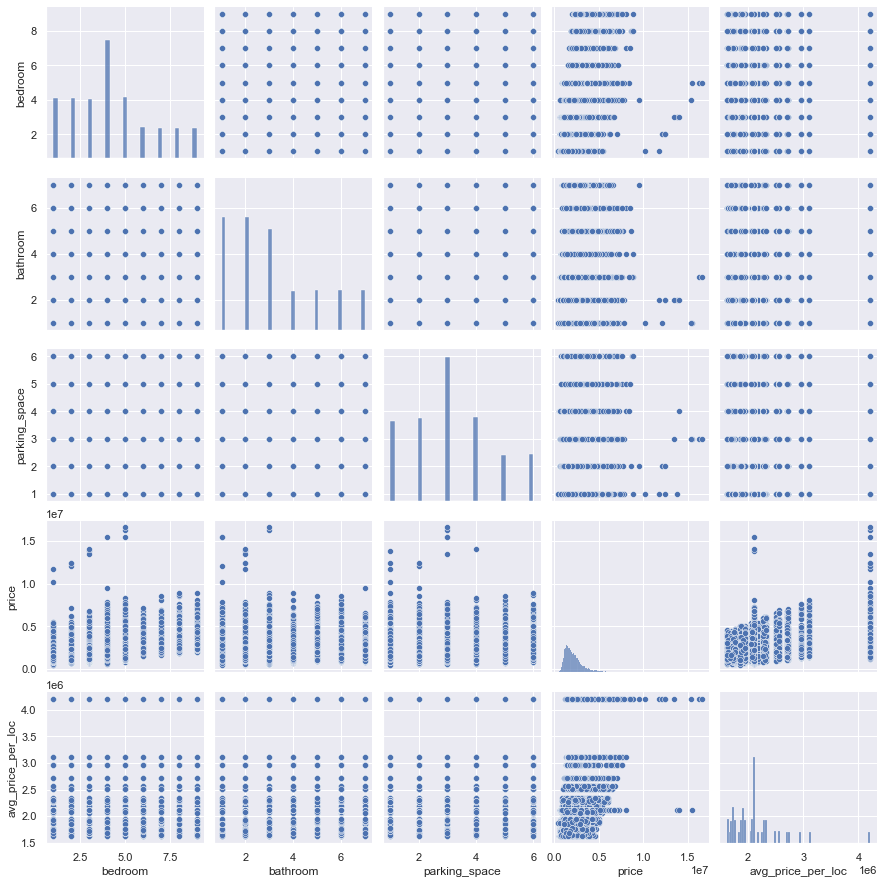

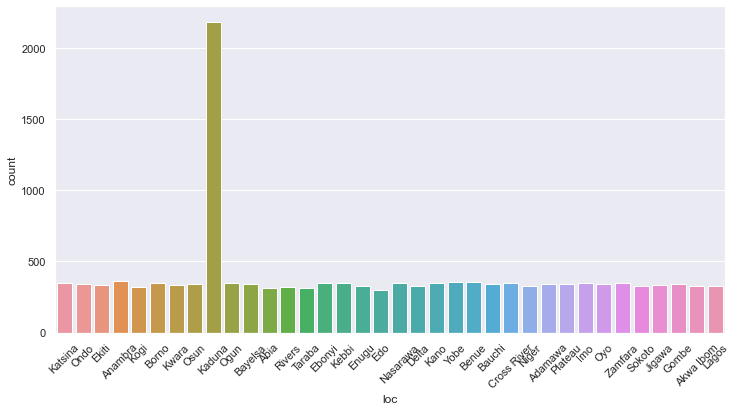

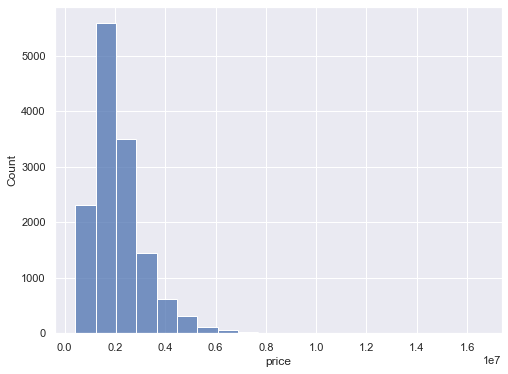

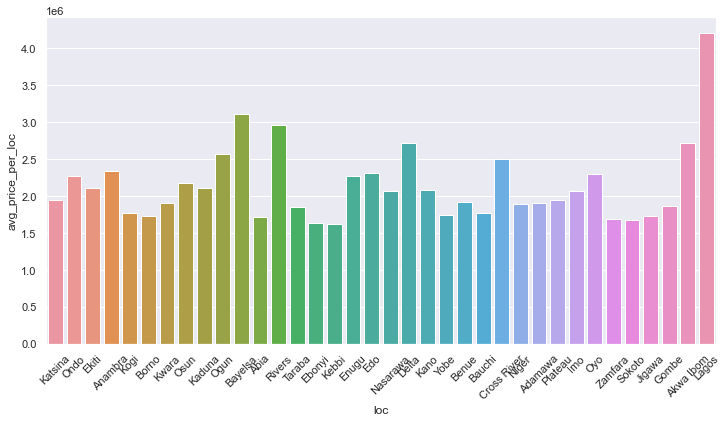

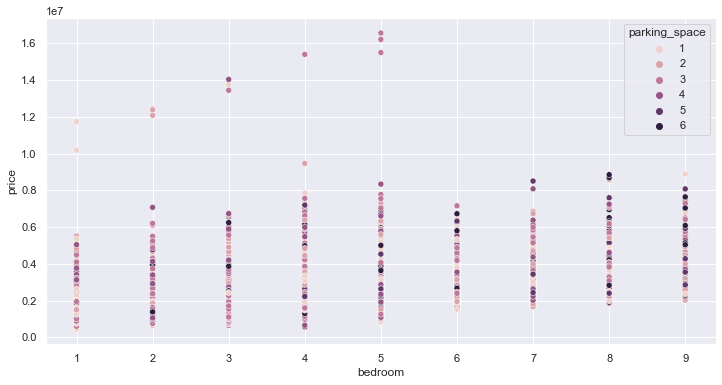

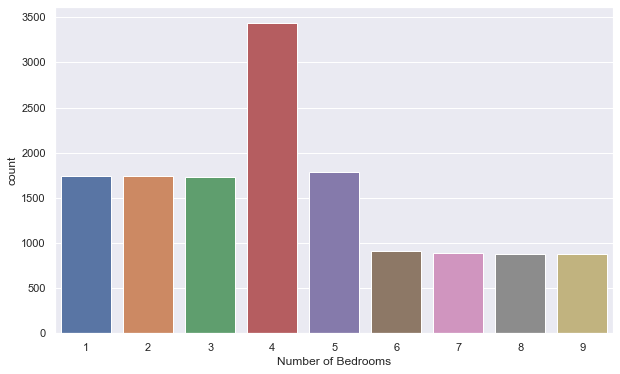

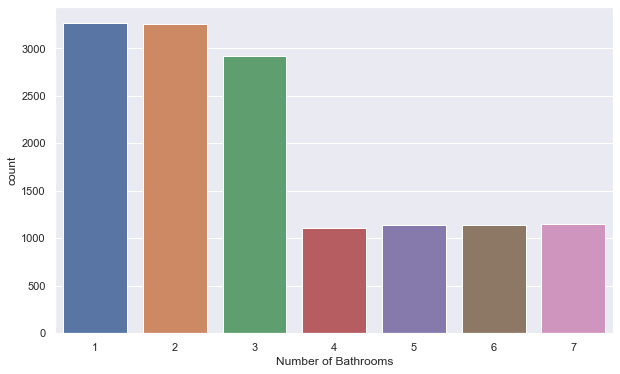

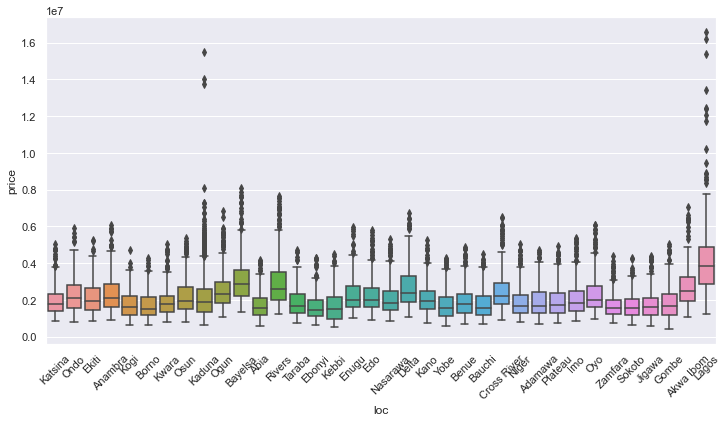

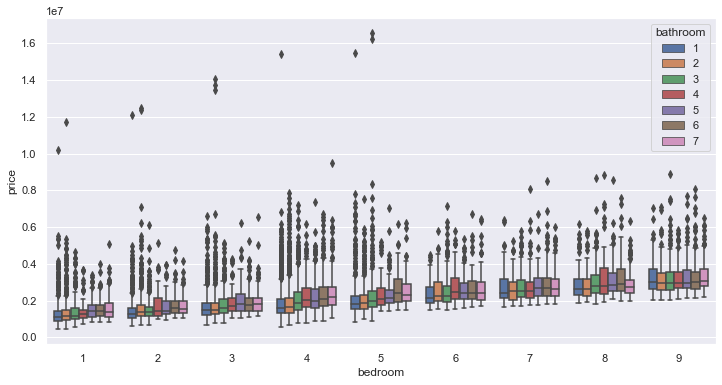

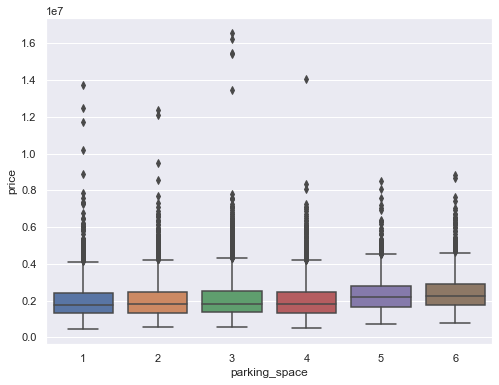

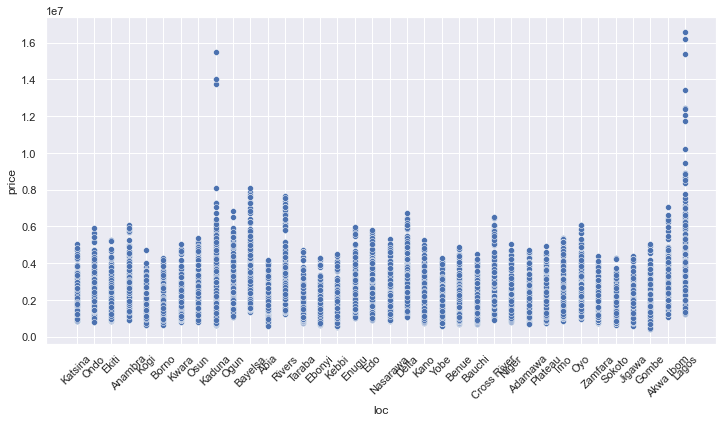

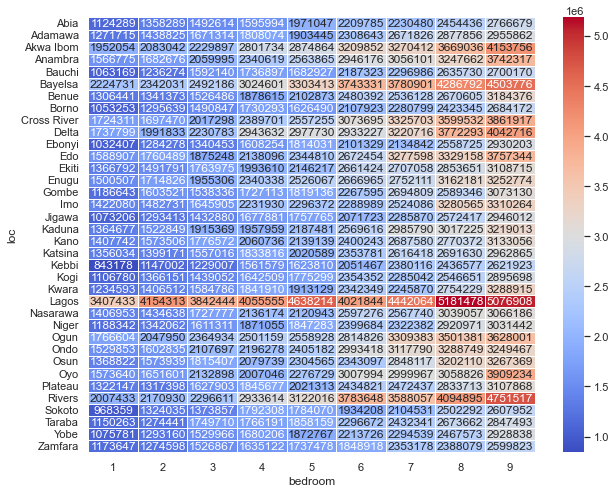

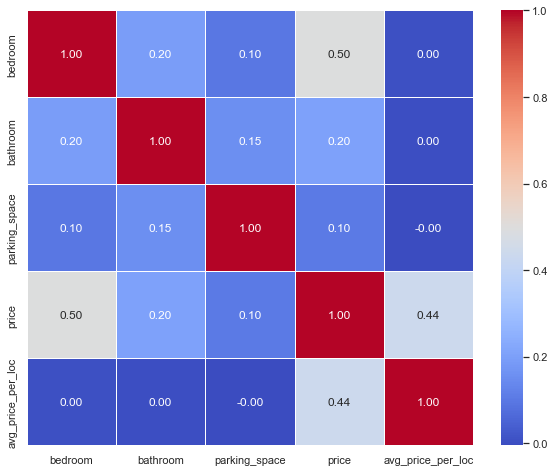

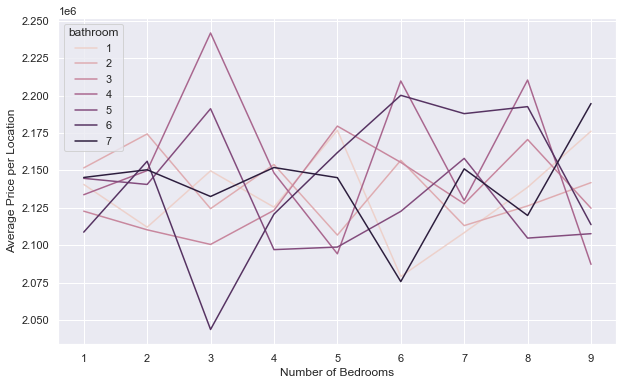

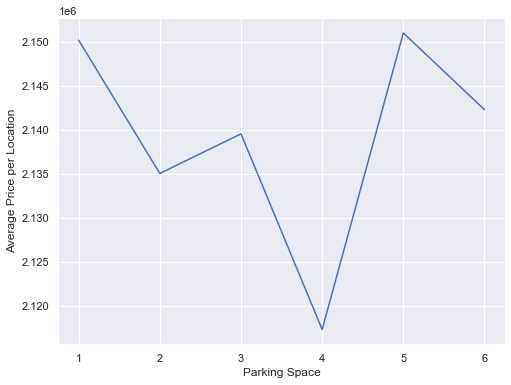

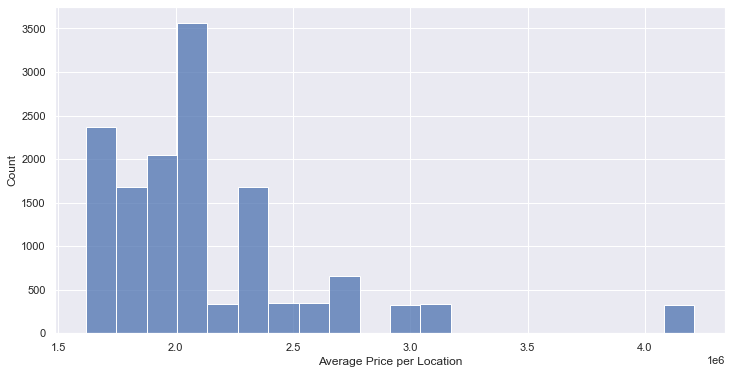

In [99]:

# Summary Statistics
summary_statistics = eda.describe()

# Data Visualization
sns.pairplot(eda[['bedroom', 'bathroom', 'parking_space', 'price', 'avg_price_per_loc']])
plt.show()

# Correlation Analysis
correlation_matrix = eda[['bedroom', 'bathroom', 'parking_space', 'price', 'avg_price_per_loc']].corr()

# Location Analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=eda, x='loc')
plt.xticks(rotation=45)
plt.show()

# Price Distribution Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=eda, x='price', bins=20)
plt.show()

# Average Price Comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=eda, x='loc', y='avg_price_per_loc')
plt.xticks(rotation=45)
plt.show()

# Price vs. Bedrooms/Bathrooms/Parking Space
plt.figure(figsize=(12, 6))
sns.scatterplot(data=eda, x='bedroom', y='price', hue='parking_space')
plt.show()


# Distribution of Bedrooms and Bathrooms
plt.figure(figsize=(10, 6))
sns.countplot(data=eda, x='bedroom')
plt.xlabel('Number of Bedrooms')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=eda, x='bathroom')
plt.xlabel('Number of Bathrooms')
plt.show()

# Price Distribution by Location
plt.figure(figsize=(12, 6))
sns.boxplot(data=eda, x='loc', y='price')
plt.xticks(rotation=45)
plt.show()

# Price Distribution by Bedroom and Bathroom
plt.figure(figsize=(12, 6))
sns.boxplot(data=eda, x='bedroom', y='price', hue='bathroom')
plt.show()

# Parking Space vs. Price
plt.figure(figsize=(8, 6))
sns.boxplot(data=eda, x='parking_space', y='price')
plt.show()

# Price Outliers vs. Location
plt.figure(figsize=(12, 6))
sns.scatterplot(data=eda, x='loc', y='price')
plt.xticks(rotation=45)
plt.show()

# Price Heatmap
plt.figure(figsize=(10, 8))
heatmap_data = eda.pivot_table(values='price', index='loc', columns='bedroom')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)
plt.show()

# Pairwise Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(eda[['bedroom', 'bathroom', 'parking_space', 'price', 'avg_price_per_loc']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

# Average Price vs. Bedrooms and Bathrooms
plt.figure(figsize=(10, 6))
sns.lineplot(data=eda, x='bedroom', y='avg_price_per_loc', hue='bathroom', ci=None)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price per Location')
plt.show()

# Average Price vs. Parking Space
plt.figure(figsize=(8, 6))
sns.lineplot(data=eda, x='parking_space', y='avg_price_per_loc', ci=None)
plt.xlabel('Parking Space')
plt.ylabel('Average Price per Location')
plt.show()


# Histogram of Average Price per Location
plt.figure(figsize=(12, 6))
sns.histplot(data=eda, x='avg_price_per_loc', bins=20)
plt.xlabel('Average Price per Location')
plt.ylabel('Count')
plt.show()


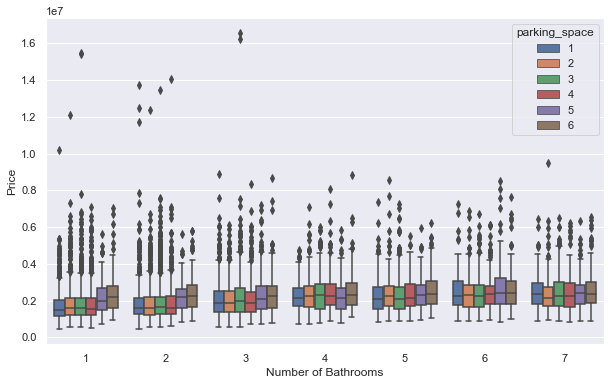

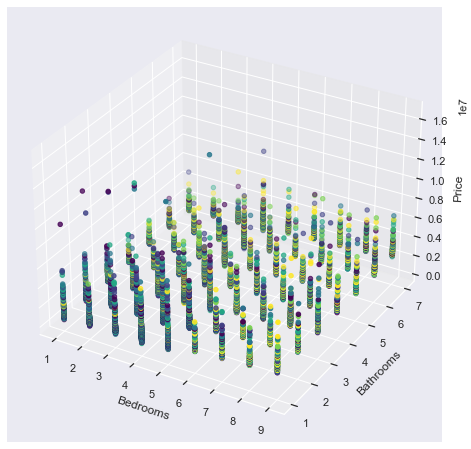

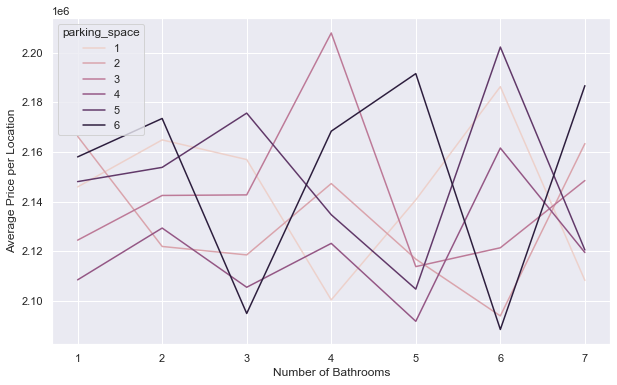

<Figure size 864x432 with 0 Axes>

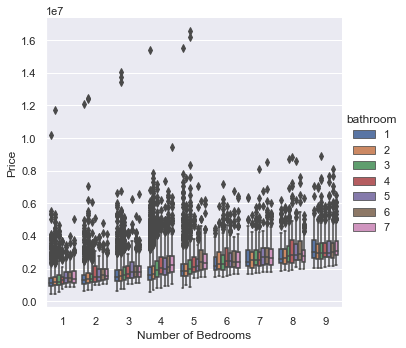

C:\Users\emmanul\AppData\Local\Temp\ipykernel_9616\2047358532.py:40: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(sc, label='Price')


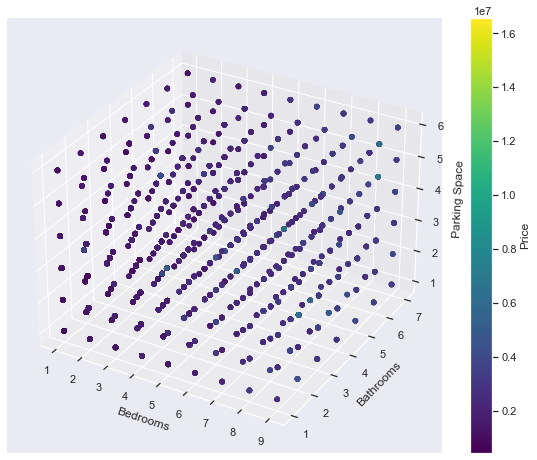

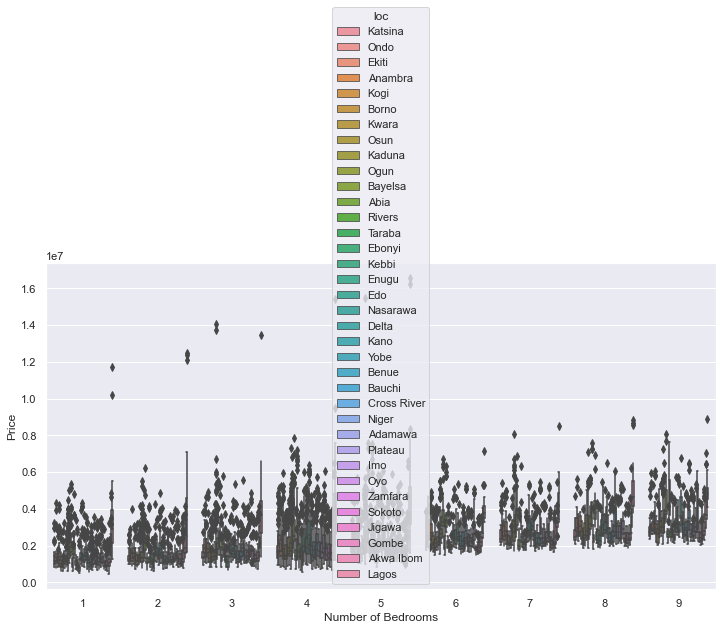

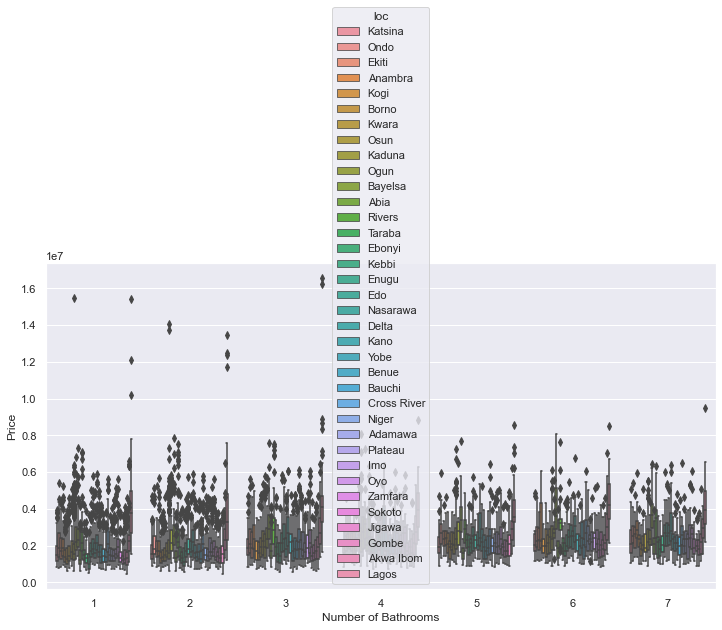

<Figure size 864x432 with 0 Axes>

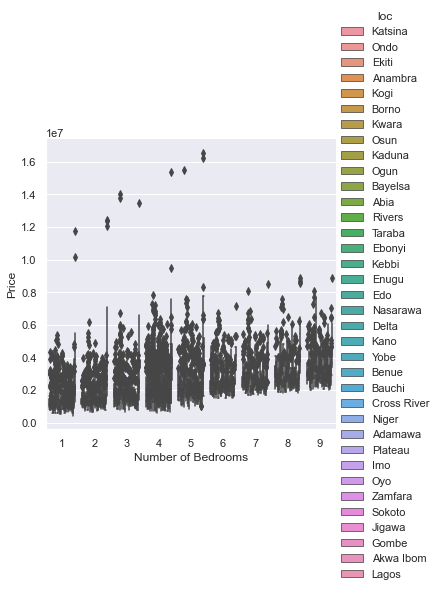

In [100]:
## Price Distribution by Bathrooms and Parking Space:
plt.figure(figsize=(10, 6))
sns.boxplot(data=eda, x='bathroom', y='price', hue='parking_space')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

## Price vs. Bedrooms and Bathrooms (3D Scatter Plot):

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eda['bedroom'], eda['bathroom'], eda['price'], c=df['parking_space'], cmap='viridis')
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Bathrooms')
ax.set_zlabel('Price')
plt.show()


## Average Price vs. Bathrooms and Parking Space:
plt.figure(figsize=(10, 6))
sns.lineplot(data=eda, x='bathroom', y='avg_price_per_loc', hue='parking_space', ci=None)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price per Location')
plt.show()

## Price Distribution by Bedrooms and Bathrooms (Categorical Plot):
plt.figure(figsize=(12, 6))
sns.catplot(data=eda, x='bedroom', y='price', hue='bathroom', kind='box')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

## Price vs. Bedrooms, Bathrooms, and Parking Space (3D Scatter Plot with Colorbar):
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(eda['bedroom'], eda['bathroom'], eda['parking_space'], c=eda['price'], cmap='viridis')
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Bathrooms')
ax.set_zlabel('Parking Space')
fig.colorbar(sc, label='Price')
plt.show()

## Price Distribution by Bedrooms and Location:
plt.figure(figsize=(12, 6))
sns.boxplot(data=eda, x='bedroom', y='price', hue='loc')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

## Price Distribution by Bathrooms and Location:
plt.figure(figsize=(12, 6))
sns.boxplot(data=eda, x='bathroom', y='price', hue='loc')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

## Price vs. Bedrooms and Location (Categorical Plot):
plt.figure(figsize=(12, 6))
sns.catplot(data=eda, x='bedroom', y='price', hue='loc', kind='box')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()


In [101]:
df.head(20)

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.000000,2.000000,1.000000,1149999.565000
1,2748,Ondo,Apartment,NaN,2.000000,4.000000,1672416.689000
2,9261,Ekiti,NaN,7.000000,5.000000,NaN,3364799.814000
3,2224,Anambra,Detached duplex,5.000000,2.000000,4.000000,2410306.756000
4,10300,Kogi,Terrace duplex,NaN,5.000000,6.000000,2600700.898000
5,1733,Borno,Mansion,NaN,1.000000,3.000000,1341750.867000
6,7892,Kwara,Bungalow,NaN,4.000000,4.000000,2125789.778000
7,3003,Katsina,Penthouse,3.000000,3.000000,5.000000,2043107.592000
8,555,Osun,Semi-detached duplex,NaN,1.000000,2.000000,1219453.877000
9,3085,Kaduna,Penthouse,NaN,3.000000,3.000000,2710664.872000
